In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
IBMQ.load_accounts()

In [1]:
import numpy as np
import math
from qiskit import *
%matplotlib inline

In [2]:
#initialization
q = QuantumRegister(2, 'q')
circ = QuantumCircuit(q)

In [61]:
a=[252,252,254,255,255,255,255,255,255,255,255,255,255,255,255,255,254,252,251,248,245,238,234,231,205,180,157,140,131,135,140,139,125,122,132,147,151,160,180,198,217,233,242,247,250,254,254,255,255,255,255,255,251,251,254,254,252,252,254,255,255,255,255,255,252,252,254,255,255,255,255,255,255,255,255,255,255,255,255,255,252,243,236,236,232,213,180,152,140,126,116,109,104,112,128,134,131,120,119,122,118,116,122,126,149,171,199,219,238,249,252,255,252,255,255,255,255,255,255,251,254,254,254,255,255,255,255,255,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,254,248,245,245,224,186,148,123,112,114,111,112,110,106,117,139,151,136,121,116,121,122,117,112,108,118,121,130,152,188,222,242,247,253,255,255,255,255,255,255,252,255,255,255,255,255,255,255,255,254,254,255,255,255,255,255,255,255,255,255,253,253,251,250,247,233,230,229,225,214,191,163,141,112,110,113,112,105,112,129,135,114,103,106,117,120,121,116,109,99,113,124,120,120,142,185,221,245,249,251,250,245,248,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,253,252,251,248,244,239,234,238,223,202,181,161,143,126,113,115,108,109,108,101,104,112,111,104,101,108,115,114,112,107,101,106,107,109,112,117,123,130,137,192,218,243,247,247,247,252,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,251,250,249,247,242,235,229,223,210,206,193,166,132,111,108,113,115,108,107,107,104,107,108,104,102,102,112,119,116,114,116,112,98,102,110,114,112,107,108,114,124,161,205,235,245,249,252,253,255,255,255,255,255,255,254,254,255,255,255,255,255,255,255,254,252,248,243,238,231,224,219,213,213,208,208,207,200,174,140,114,108,101,102,102,99,98,101,97,91,93,104,111,112,115,117,113,117,102,91,99,111,116,113,109,103,119,147,182,220,247,251,252,255,255,255,255,255,255,254,252,255,255,255,255,255,255,255,254,251,247,239,230,222,216,211,208,207,204,195,174,148,130,123,121,117,113,114,112,102,100,103,101,106,105,110,114,114,117,117,109,110,108,109,109,107,103,107,114,119,106,101,127,180,228,248,252,255,255,255,255,255,255,254,252,255,255,255,255,255,255,255,254,249,244,234,221,214,211,209,204,203,200,197,189,171,145,121,106,117,118,118,115,111,109,106,105,111,108,112,120,118,115,118,118,118,113,108,106,109,111,111,108,109,105,105,115,131,163,216,249,252,251,252,255,255,255,254,254,255,255,255,255,255,255,255,254,249,244,233,220,211,208,206,202,199,197,188,167,139,118,113,115,110,113,115,115,114,114,114,115,116,112,116,123,120,117,117,118,118,116,112,108,109,110,110,109,102,105,112,113,112,129,174,217,248,251,251,252,254,255,255,254,255,255,255,255,255,255,255,254,249,244,233,220,211,207,205,202,208,203,189,163,132,110,100,99,105,106,108,111,113,115,116,118,120,119,119,123,121,119,118,120,119,118,116,114,110,108,109,109,102,106,113,111,106,109,133,161,229,247,249,247,247,255,255,252,255,255,255,255,255,255,255,254,249,244,233,220,210,207,204,200,199,200,202,204,203,193,173,154,105,102,102,104,106,106,107,109,125,125,121,120,121,119,115,118,117,118,119,115,111,108,108,109,109,103,101,107,111,113,117,125,183,224,245,249,246,255,255,254,254,255,255,255,255,255,255,255,251,246,233,220,210,207,204,200,202,203,203,202,199,184,154,127,122,114,109,109,108,105,103,105,125,129,121,116,118,117,113,117,116,117,118,114,111,108,107,108,110,103,103,106,111,113,113,115,129,186,240,247,251,254,255,255,254,254,255,255,255,255,255,255,251,246,233,220,210,207,204,202,203,209,208,201,195,187,173,158,137,127,118,118,116,111,109,110,125,130,120,110,116,115,109,115,113,114,116,115,111,109,107,108,104,109,111,109,101,102,106,113,99,147,207,244,251,254,255,255,254,255,255,255,255,255,255,255,252,247,234,221,211,207,204,202,203,209,209,206,206,203,191,175,134,123,115,118,119,116,113,116,123,130,118,105,113,111,106,113,110,110,111,112,113,110,106,105,105,112,114,107,100,99,103,110,104,119,161,217,249,255,255,255,252,252,254,254,255,255,255,254,252,247,235,223,213,208,205,203,209,210,207,206,210,200,167,133,122,110,104,109,114,112,112,116,124,132,118,103,109,109,103,113,110,111,111,114,115,112,105,104,113,113,108,106,108,110,107,103,120,105,127,193,246,254,255,255,248,249,248,240,234,238,245,249,245,248,239,227,219,211,202,204,215,215,209,208,208,203,191,179,157,147,133,119,102,96,103,116,136,140,121,107,110,104,97,111,109,115,119,118,116,115,109,108,109,114,113,108,106,107,106,108,110,114,111,144,216,248,252,250,246,247,244,233,226,232,240,246,245,247,239,226,219,212,203,208,218,219,211,208,205,202,191,180,184,179,170,158,139,118,104,101,133,144,127,107,107,103,99,110,112,119,121,121,119,116,108,106,109,115,112,110,107,107,108,108,107,115,115,128,185,241,248,244,247,245,236,228,223,227,236,242,246,247,239,223,217,211,205,210,220,221,212,209,205,202,192,181,184,165,139,118,106,102,104,112,125,144,133,111,105,106,105,110,115,120,123,125,126,123,113,107,109,113,111,111,108,107,107,107,106,117,118,116,150,218,247,246,244,240,232,224,220,224,234,240,243,244,235,221,214,211,206,210,221,220,214,209,204,202,193,184,185,176,161,144,126,111,99,96,117,141,138,114,104,107,110,112,116,123,128,135,138,136,124,115,112,113,109,109,108,105,104,105,107,113,119,112,125,187,243,247,241,237,226,221,219,225,232,239,239,241,233,221,214,210,205,210,222,221,215,207,204,202,197,191,190,194,192,179,156,132,111,103,110,135,139,119,106,111,115,114,117,127,137,146,150,149,137,127,117,112,109,109,109,104,104,106,110,105,117,120,118,157,217,242,238,231,221,218,219,222,227,234,234,239,231,219,213,208,204,208,220,221,214,207,204,203,200,196,186,182,168,143,121,110,110,111,107,128,137,126,112,112,116,116,121,130,142,149,153,153,145,139,124,115,107,108,108,103,102,105,109,103,113,124,121,135,190,240,237,226,215,214,217,219,222,227,228,234,229,218,214,208,203,207,219,220,214,207,206,205,205,201,192,191,177,154,128,113,98,89,104,120,134,131,117,115,118,118,127,135,141,142,142,145,147,145,133,119,108,108,108,102,102,107,104,107,112,118,118,123,169,232,233,221,210,210,214,215,216,221,225,231,227,217,212,207,202,205,217,220,214,207,206,206,207,204,193,194,188,177,162,148,130,115,103,115,131,134,121,116,119,120,131,137,137,133,131,136,145,149,137,121,108,107,107,102,102,107,100,112,111,109,112,118,159,222,228,219,211,209,208,209,213,218,214,218,218,217,213,210,204,203,215,216,211,207,208,207,200,192,190,195,189,173,158,148,131,114,108,111,126,138,133,116,117,132,144,130,121,122,126,126,129,136,148,135,111,102,112,112,102,106,99,106,112,110,117,116,134,199,223,217,210,208,208,207,210,215,214,217,217,217,214,210,207,206,214,215,212,207,207,207,199,191,189,193,186,172,159,149,132,114,107,108,122,137,135,123,123,133,139,126,116,118,123,122,127,133,145,139,119,105,110,111,106,106,102,107,111,108,113,112,124,182,220,213,209,209,207,205,207,212,215,217,216,216,214,212,208,207,212,213,212,209,207,204,196,190,192,191,183,172,161,151,132,113,107,106,118,134,137,132,130,135,131,120,113,115,119,119,122,128,139,142,129,110,106,110,109,108,108,107,111,107,112,110,114,160,215,211,209,208,206,204,204,207,214,215,216,217,217,215,212,208,211,212,210,209,205,201,195,189,195,193,185,173,162,149,131,111,103,102,111,127,138,140,139,138,121,114,110,111,114,115,118,122,133,145,139,116,106,110,112,107,110,106,110,107,113,111,110,142,214,210,207,209,206,204,203,206,214,215,217,219,222,220,214,210,210,211,210,208,203,196,191,190,199,195,187,176,163,147,127,110,100,97,105,119,136,145,143,137,115,108,105,107,110,111,114,118,128,144,146,126,108,111,115,107,111,106,112,108,114,115,109,130,215,210,207,206,206,203,202,206,212,215,218,223,227,225,216,210,210,210,209,207,199,191,189,192,198,196,190,179,163,146,127,114,98,96,103,113,131,142,140,130,109,105,103,103,106,108,111,117,124,139,148,136,115,111,115,110,113,107,113,109,114,118,111,123,216,211,207,206,206,204,204,208,213,215,220,227,232,230,219,210,211,210,208,205,196,186,188,195,194,196,192,182,164,146,131,120,100,99,102,108,123,135,131,119,106,105,101,101,103,107,112,116,121,135,149,144,123,113,114,111,114,107,114,108,111,117,110,117,216,211,207,205,205,204,205,209,211,215,221,228,234,233,223,211,212,208,207,204,194,184,187,194,189,192,191,183,167,150,138,132,107,105,106,106,115,125,120,107,103,103,101,100,102,106,109,115,117,128,146,149,127,113,115,111,114,108,115,108,107,114,106,111,208,206,208,209,205,206,209,209,209,213,221,231,234,235,224,212,212,207,204,200,196,191,189,188,187,194,198,190,174,165,166,166,135,106,104,111,104,103,109,100,104,101,100,99,102,102,103,107,118,117,131,146,136,117,111,113,114,108,115,108,105,112,104,109,207,205,208,210,206,207,211,209,209,211,218,227,234,232,223,212,208,207,208,203,197,190,188,188,190,193,192,183,174,167,168,169,148,115,108,110,104,102,103,92,99,100,101,102,102,101,102,106,115,115,127,143,137,118,111,113,114,108,114,106,108,113,106,113,211,208,210,209,205,207,210,209,209,210,213,220,226,227,221,212,207,207,211,208,201,193,190,188,192,189,184,177,172,170,172,169,149,118,107,108,104,104,102,92,96,100,104,105,104,102,102,107,113,114,127,142,141,123,113,112,114,108,113,107,111,115,108,122,213,209,210,210,208,208,210,207,208,209,210,214,218,221,217,212,208,206,209,210,208,201,194,187,187,181,175,173,174,175,174,167,140,119,108,106,102,102,104,98,99,102,107,108,105,100,98,103,109,114,124,139,144,128,114,113,114,108,110,106,111,114,109,130,219,213,211,211,208,209,212,206,208,207,206,210,214,214,213,210,211,206,208,212,216,211,198,185,179,174,169,169,171,169,163,156,142,129,121,112,101,100,104,107,103,107,110,109,105,99,94,97,106,112,119,134,147,135,117,113,114,109,110,105,112,111,110,143,224,215,213,212,210,213,212,208,206,204,204,206,209,209,210,209,214,210,208,211,215,209,194,180,173,170,167,165,163,158,152,145,152,147,137,120,105,97,102,110,107,107,107,107,104,99,92,93,102,111,114,129,148,139,118,115,112,108,110,105,112,110,116,163,228,219,216,215,213,215,214,207,204,204,203,203,205,207,208,207,214,214,213,212,207,197,183,173,170,170,168,164,159,156,155,155,158,154,140,121,106,98,100,107,107,103,101,103,103,101,93,92,99,108,108,123,148,142,121,117,108,109,111,106,113,114,127,188,233,223,219,218,213,216,215,207,203,203,203,203,204,205,206,207,214,217,218,212,200,185,174,169,168,170,170,166,161,161,167,172,155,150,134,114,105,100,100,103,105,98,95,98,102,102,94,92,96,105,105,120,147,144,121,118,105,107,111,107,117,118,139,205,238,231,221,216,218,222,216,207,202,200,201,203,204,205,208,209,212,219,221,213,196,177,169,169,169,170,172,174,174,171,166,162,145,150,140,120,105,97,95,101,102,99,97,95,96,100,100,102,90,103,109,118,142,150,132,111,113,111,105,108,113,113,156,230,242,235,225,217,218,220,216,206,199,201,204,205,203,204,209,215,224,224,219,209,193,175,170,171,167,166,165,163,162,159,156,153,148,152,145,127,110,98,95,99,99,98,95,93,96,99,100,100,89,99,105,117,142,152,136,113,113,103,101,111,115,122,176,245,245,239,228,220,217,217,213,206,199,204,208,207,204,205,210,218,229,221,208,195,181,169,167,169,161,159,156,153,151,150,150,150,150,148,143,132,115,99,94,97,97,97,96,94,96,99,100,99,90,96,102,115,140,155,141,116,113,101,103,111,112,136,201,251,247,243,232,221,216,216,213,206,202,203,207,207,208,208,210,213,214,203,188,175,165,159,157,159,152,152,152,151,148,148,150,151,148,137,131,129,117,101,93,92,95,96,96,96,97,99,101,101,94,94,100,112,137,154,144,117,112,105,107,106,108,157,225,254,249,247,237,225,217,214,211,207,207,204,203,208,213,212,205,199,191,183,171,164,157,152,151,152,149,151,151,150,146,143,143,143,143,123,118,128,121,104,93,87,92,97,98,97,97,101,104,101,99,94,101,113,133,154,148,119,105,108,109,99,115,186,247,250,249,248,241,228,218,215,212,207,210,204,203,207,213,208,196,184,173,167,161,160,155,152,151,153,150,152,150,146,138,131,129,128,136,114,119,142,132,107,93,85,90,96,100,98,99,101,105,103,101,92,101,113,130,151,152,125,101,106,104,101,139,216,252,253,250,249,244,233,223,215,212,208,210,205,206,210,210,202,186,171,161,159,158,159,156,154,153,156,153,154,149,141,131,124,123,125,130,115,138,166,147,110,94,88,89,95,100,100,100,102,107,103,98,89,101,113,126,151,157,133,112,107,97,116,176,234,254,255,249,251,247,236,224,218,212,209,205,206,209,212,207,194,177,164,154,151,152,153,152,150,152,157,156,154,150,139,129,124,126,130,124,120,159,191,163,117,98,92,91,98,100,98,95,97,103,103,96,90,101,112,121,147,159,139,129,113,99,135,207,244,252,255,255,254,249,244,230,219,210,206,210,197,204,212,193,171,164,159,151,149,149,151,152,153,153,151,156,152,144,134,126,122,119,119,126,140,193,225,183,130,105,96,91,99,99,90,83,89,99,98,84,93,103,104,113,134,148,146,151,106,124,195,237,246,255,255,255,255,252,246,235,223,213,207,204,200,207,203,178,159,155,153,148,146,147,149,151,154,155,155,151,143,134,126,124,127,132,137,161,170,217,237,193,133,104,98,93,101,99,89,81,86,99,101,94,96,101,104,109,127,143,146,143,128,157,218,245,250,255,255,255,255,252,248,241,231,221,211,205,209,211,192,162,148,151,150,149,150,152,154,152,150,147,146,136,132,127,128,136,152,169,179,179,186,227,235,196,135,106,101,96,102,101,93,86,91,103,105,99,93,97,106,113,126,143,153,146,158,199,238,248,251,255,255,255,254,251,249,245,239,229,219,211,218,209,179,153,149,152,150,148,151,156,156,151,142,136,132,123,136,154,170,180,181,176,171,167,176,217,233,201,144,110,106,97,103,103,97,90,96,108,109,101,87,93,110,117,126,145,161,166,197,233,245,247,254,255,255,255,254,253,252,249,247,239,231,222,223,203,166,149,152,155,150,147,150,151,152,149,146,144,145,171,173,178,181,179,174,167,162,156,166,208,231,211,153,113,105,97,104,104,99,95,98,111,111,100,84,91,107,115,124,147,166,202,230,245,248,246,254,255,255,254,254,254,254,254,252,249,243,232,228,196,157,146,154,152,148,149,151,151,152,154,162,172,178,190,185,176,169,164,164,168,169,159,170,206,231,219,162,115,103,97,102,103,99,95,97,110,112,101,86,93,105,112,126,156,182,233,248,249,249,247,254,255,255,252,254,255,255,255,255,255,254,247,238,200,160,150,152,150,152,161,166,173,177,178,183,188,193,162,166,172,176,175,167,157,151,162,166,193,223,214,163,116,105,96,99,99,98,92,93,107,110,99,93,99,104,114,143,189,223,249,252,252,251,254,253,252,255,252,254,255,255,255,255,255,255,255,249,210,168,156,154,151,158,171,186,199,208,205,195,187,181,187,178,164,153,147,146,149,155,154,155,175,205,203,161,119,111,95,97,96,95,90,90,102,109,101,99,105,108,123,165,224,249,254,255,252,254,254,252,249,255,254,255,255,255,255,255,255,255,255,254,234,200,178,183,199,212,217,218,219,217,211,198,185,176,164,156,155,155,150,148,149,151,157,162,178,181,160,137,118,109,96,92,90,95,89,87,96,108,109,103,108,134,182,226,248,254,255,255,255,255,255,255,255,255,254,255,255,255,255,255,255,255,255,255,252,241,229,229,231,228,227,216,201,187,175,167,162,157,153,148,146,147,140,141,143,146,161,166,179,177,158,141,124,112,98,92,89,92,88,88,102,117,105,119,144,177,215,243,251,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,251,253,252,249,247,244,234,219,200,192,183,177,171,169,165,161,165,159,160,157,152,152,156,159,169,173,179,168,147,134,116,98,98,97,97,101,97,94,104,115,128,157,192,223,240,248,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,250,248,248,240,226,190,183,177,174,173,173,170,167,158,154,155,151,147,151,156,155,162,169,173,162,145,139,122,98,108,108,105,106,103,109,126,140,179,202,228,238,247,252,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,252,250,250,245,231,215,192,171,158,152,150,151,147,144,144,144,144,152,158,154,145,153,165,160,150,150,139,120,118,116,110,112,122,144,180,203,224,235,241,247,250,254,255,255,255,255,254,254,255,255,255,255,255,255,255,255,255,254,254,254,248,253,255,255,253,251,252,252,248,243,223,204,184,167,155,147,150,146,144,144,149,161,166,156,142,145,158,156,145,141,131,117,117,128,139,157,175,201,232,244,241,244,248,252,255,255,255,255,255,255,252,252,254,255,255,255,255,255,255,255,254,252,252,252,252,254,255,255,255,255,255,255,252,249,248,243,232,217,199,188,174,165,157,152,155,166,164,145,147,143,157,162,152,147,143,142,157,176,198,216,228,237,252,255,248,251,255,255,255,255,255,255,255,254,252,252,254,255,255,255,255,255,255,254,252,252,251,251,252,251,250,252,255,255,255,255,255,251,249,248,245,240,234,227,218,206,191,180,179,184,178,151,141,138,159,175,177,181,190,201,227,237,238,238,237,244,255,255,254,255,255,255,255,255,255,255,255,252,251,252,254,255,255,255,255,255,255,255,254,254,253,253,247,249,252,252,252,252,251,250,254,255,255,255,255,255,255,255,243,227,209,197,193,200,209,207,189,183,191,203,205,211,229,242,254,255,255,255,255,255,255,250,250,249,250,249,246,249,254,255,255,255,255,255,254,253,252,252,255,255,255,255,254,254,254,253,251,252,252,253,253,253,253,254,255,252,247,249,250,236,209,186,182,175,171,166,166,180,198,204,198,183,180,183,177,172,173,173,191,206,226,242,253,255,255,255,245,248,252,253,254,255,255,253,255,255,255,255,254,254,253,253,255,255,255,255,254,254,254,254,254,254,253,252,253,254,255,255,255,255,255,245,209,176,157,150,158,161,167,170,170,184,208,220,205,189,184,187,186,178,171,162,167,165,167,184,213,242,255,255,255,254,255,255,255,255,255,252,255,255,255,254,254,254,254,253,255,255,255,255,254,254,254,254,254,254,255,255,255,255,255,255,249,251,253,252,244,226,201,185,162,165,173,174,172,181,198,207,186,176,179,188,191,190,183,172,158,167,171,162,157,174,212,244,255,255,255,255,250,250,254,255,254,254,254,254,254,254,254,255,255,255,255,255,254,254,254,255,253,255,255,255,255,255,254,253,255,253,234,216,201,186,173,164,170,168,171,172,168,172,180,182,179,176,183,190,189,186,180,172,173,168,166,164,165,167,172,174,222,241,255,255,255,252,254,254,253,253,253,253,254,254,255,255,255,255,255,255,254,254,255,255,253,255,255,255,255,255,252,250,243,244,235,209,178,161,162,170,175,170,171,174,172,175,178,176,177,180,190,197,194,193,191,186,170,171,174,174,169,162,160,161,166,196,235,255,255,255,255,253,253,252,252,253,254,255,255,255,255,255,254,254,254,254,255,255,255,255,255,255,255,254,251,249,255,255,255,255,253,231,199,176,173,169,169,171,167,168,170,167,163,168,179,186,187,190,192,188,191,174,160,163,173,176,170,164,154,166,189,217,245,255,255,252,253,252,252,253,254,255,255,255,255,255,254,254,254,254,255,255,255,255,255,255,254,252,252,252,255,255,249,230,207,191,186,188,185,183,183,181,172,170,172,170,176,176,183,187,187,190,190,182,183,180,178,176,171,165,167,174,179,162,152,169,212,251,255,255,255,253,253,253,254,255,255,255,255,255,254,254,254,254,255,255,255,255,255,251,250,253,255,255,255,255,255,249,233,209,187,175,186,190,190,186,181,179,175,171,176,171,178,188,186,186,189,189,189,184,176,173,173,172,170,169,176,169,164,164,170,193,235,255,255,251,252,254,255,255,255,255,255,255,254,254,254,254,255,255,255,255,255,252,252,255,255,255,255,255,248,229,202,183,180,183,182,185,187,186,185,184,183,181,178,172,178,186,186,185,188,189,189,184,179,174,172,171,169,170,171,174,176,169,159,166,201,236,255,255,255,254,254,255,255,255,255,255,254,254,254,254,255,255,255,255,255,252,252,255,255,255,255,255,247,223,195,175,166,166,173,175,177,180,181,183,183,183,182,179,181,185,187,185,186,188,187,186,182,177,171,169,168,170,171,175,177,170,157,153,170,191,252,255,255,252,249,255,255,250,255,255,254,254,254,254,254,255,255,255,255,252,252,255,255,255,255,255,255,255,255,255,236,220,172,170,170,172,174,174,175,175,187,187,186,186,189,187,186,189,188,189,187,181,174,169,169,170,176,172,168,168,167,164,164,164,215,249,255,255,251,255,254,249,255,255,254,254,254,254,254,255,255,255,255,252,252,255,255,255,255,255,255,255,255,242,213,188,184,179,175,175,175,172,170,172,193,196,191,186,190,190,188,192,189,190,189,185,177,171,170,171,174,170,167,170,172,172,167,164,171,221,255,255,255,254,253,252,255,255,255,254,254,253,254,255,255,255,255,252,252,255,255,255,255,255,255,254,248,243,230,218,198,189,184,184,183,178,177,179,196,204,194,187,194,193,189,195,191,192,191,188,182,177,173,172,167,170,175,173,168,166,170,172,150,189,237,255,255,254,251,251,255,255,254,254,253,253,254,254,255,255,255,251,252,255,255,255,254,255,255,255,255,255,245,232,192,182,177,182,183,181,181,186,198,210,198,188,196,196,191,198,193,193,191,190,188,183,177,171,166,171,175,174,169,168,172,174,160,166,196,240,255,254,249,249,255,255,255,255,255,255,255,255,255,255,254,250,251,255,255,255,255,254,251,253,255,253,220,187,177,167,162,170,176,177,180,186,198,210,198,188,198,198,192,200,195,191,189,189,190,187,179,172,173,170,168,170,174,178,175,170,180,157,167,220,255,255,250,250,255,255,255,251,245,249,254,255,254,255,255,250,252,253,253,255,255,253,251,252,255,255,245,232,209,198,185,172,161,157,170,183,200,207,196,189,200,198,191,197,189,188,188,186,186,187,185,180,167,167,168,167,166,169,172,171,170,167,155,178,237,255,255,251,255,255,255,250,245,249,255,255,255,255,255,249,251,253,254,255,255,252,252,252,255,255,245,233,234,226,217,208,194,179,170,167,193,206,198,189,197,198,192,196,190,187,185,182,184,187,184,177,167,167,167,166,167,168,170,171,167,171,162,167,213,255,255,253,255,255,255,247,244,248,255,255,255,255,255,249,250,253,255,255,255,254,252,253,255,255,246,233,232,212,185,167,161,162,171,178,185,206,204,191,194,197,194,194,190,186,184,183,187,189,184,176,166,165,166,167,168,169,169,170,166,173,168,155,178,238,255,255,255,255,253,247,246,250,255,255,255,255,255,248,250,253,255,255,255,255,254,253,255,255,246,236,233,222,207,193,180,171,166,163,178,205,209,194,190,196,196,191,187,185,186,190,195,196,188,178,169,166,166,168,170,170,170,171,169,171,171,156,158,212,255,255,255,255,252,248,249,252,255,255,255,255,255,248,250,254,255,255,255,255,255,253,254,255,248,240,235,238,237,227,210,191,177,170,172,201,212,197,189,194,195,188,184,185,189,194,201,201,194,185,173,167,165,168,171,169,170,172,174,166,170,166,156,187,241,255,255,255,251,250,252,255,255,255,255,255,255,249,251,255,255,255,255,255,255,253,254,255,250,244,231,226,213,191,174,170,175,180,172,195,209,201,190,192,193,186,182,187,190,194,198,199,196,191,179,171,166,168,170,169,170,173,176,165,169,173,161,171,220,255,255,255,248,250,255,255,255,255,255,255,255,250,252,255,255,255,255,255,255,253,253,255,252,247,235,233,221,201,183,172,165,158,172,188,205,203,192,188,189,185,186,187,187,185,185,188,192,194,185,174,166,168,170,168,170,176,171,171,170,170,163,163,204,255,255,254,248,251,255,255,255,255,255,255,255,250,253,254,255,255,255,255,255,253,253,255,254,250,235,235,232,224,217,209,198,185,172,183,201,205,193,187,187,184,188,188,184,176,172,177,187,194,188,176,166,167,169,168,170,176,167,176,171,164,162,163,199,255,255,255,252,253,255,255,255,255,250,250,250,250,254,254,255,254,255,255,254,253,255,255,247,235,230,233,231,219,212,209,199,186,178,181,196,208,200,182,179,191,200,182,168,166,168,166,170,179,195,188,168,161,174,175,169,173,166,170,174,167,169,164,179,242,255,255,252,255,255,255,255,255,252,250,249,250,252,254,255,254,255,255,255,253,254,254,245,234,229,231,228,218,213,210,201,187,180,180,192,205,201,185,182,190,195,180,168,167,167,165,167,175,191,189,172,162,170,174,170,173,169,171,172,165,168,164,172,230,255,254,253,255,255,255,255,255,253,250,248,249,252,254,255,254,254,255,255,255,255,251,242,231,229,229,224,217,215,211,201,187,181,179,188,200,201,192,188,193,188,177,168,168,168,166,165,170,184,191,179,164,164,171,171,170,170,168,170,163,167,162,166,211,255,253,253,255,255,255,255,254,255,251,248,249,253,255,255,255,254,255,255,255,253,247,238,231,233,229,224,218,216,211,200,186,179,175,181,193,200,199,195,194,182,174,169,169,170,167,165,168,177,190,186,168,161,169,172,169,171,167,169,163,168,166,163,195,255,252,254,255,255,255,254,253,255,251,249,251,255,255,255,253,253,254,255,255,251,242,234,230,235,231,226,220,216,209,198,186,177,172,174,185,197,202,200,195,176,173,170,172,171,169,167,166,171,187,190,174,161,167,172,167,170,165,168,164,168,170,165,186,255,252,254,255,255,255,255,254,254,251,250,253,255,255,255,253,253,255,255,255,247,237,233,232,234,232,229,223,216,208,198,189,176,172,172,178,190,198,196,189,174,173,174,173,172,171,170,168,166,179,192,182,165,165,170,167,169,163,168,164,168,173,167,180,255,253,254,255,255,255,255,255,254,251,252,255,255,255,255,251,254,255,255,254,244,232,230,233,230,230,229,226,217,208,202,198,180,176,173,173,181,191,189,180,171,174,176,175,174,173,173,170,162,171,191,190,171,164,169,166,168,163,169,163,165,172,166,174,255,255,254,255,255,255,255,255,253,251,253,255,255,255,255,249,255,255,255,253,243,231,229,234,227,228,230,226,217,207,202,201,182,179,174,170,176,185,182,172,172,176,177,176,174,175,176,172,162,168,189,194,175,164,167,166,169,162,170,163,163,171,164,169,255,253,255,255,253,254,255,253,250,251,254,255,255,255,254,245,255,255,253,249,243,238,233,230,228,235,239,231,217,208,211,218,195,171,169,177,170,171,179,172,178,177,177,176,174,172,170,169,169,164,178,194,188,168,164,166,169,163,171,164,164,171,164,170,255,253,255,255,253,254,255,253,251,252,254,255,255,255,253,245,252,255,255,251,244,237,232,232,232,235,233,224,212,205,206,212,204,178,172,177,172,174,178,169,176,179,180,179,177,175,173,171,169,165,178,195,190,172,164,166,169,163,170,165,167,174,168,175,255,252,254,255,252,254,255,253,253,252,254,255,255,255,253,248,251,255,255,255,248,240,234,232,234,231,225,218,213,211,210,212,203,178,169,173,172,176,178,170,177,182,186,187,182,178,176,174,169,166,177,194,194,176,165,165,169,163,169,166,170,174,168,179,255,251,252,254,252,255,255,254,255,253,252,255,255,255,253,250,252,254,255,255,255,248,238,231,229,223,216,214,215,216,212,210,194,178,170,172,170,174,180,179,182,188,194,194,188,180,178,174,169,167,175,190,196,181,166,166,169,165,169,165,170,171,164,186,255,251,252,253,252,255,255,254,255,254,253,254,255,255,254,252,255,253,252,255,255,255,240,227,221,216,210,210,212,210,204,199,192,186,181,175,169,172,182,189,190,195,200,199,192,184,178,174,170,169,172,186,196,184,167,165,169,166,169,164,169,166,162,194,255,251,251,253,252,255,255,255,255,255,255,254,255,255,254,253,255,254,252,255,255,253,236,222,215,212,208,206,204,199,193,188,200,200,194,182,171,172,182,195,196,199,201,201,198,190,183,175,172,172,169,180,196,187,167,167,167,168,171,164,167,162,164,209,255,251,249,253,254,255,255,255,255,255,255,255,255,255,255,254,255,255,255,254,249,239,225,215,210,210,208,204,199,196,195,196,204,205,194,180,173,173,182,196,200,199,199,201,201,197,188,180,175,173,166,175,195,188,167,167,165,169,173,166,168,162,171,227,255,250,249,251,254,255,255,255,255,255,255,255,255,255,254,254,255,255,255,254,242,227,216,211,208,210,210,206,201,201,207,213,200,200,187,173,172,175,182,194,201,199,198,201,205,202,194,184,176,176,164,171,193,187,167,168,162,169,175,169,169,163,176,239,255,254,248,248,255,255,255,255,255,255,255,255,255,255,255,255,254,255,255,253,236,217,209,209,209,210,212,214,214,211,206,204,187,196,190,178,172,172,180,192,199,201,201,199,200,202,200,194,174,178,172,171,185,190,175,160,170,173,169,170,165,153,187,255,255,254,248,247,254,255,255,255,254,255,255,255,255,255,255,255,255,255,255,247,231,215,210,211,207,206,205,203,202,199,196,195,189,197,194,184,176,173,180,192,199,202,202,200,200,201,200,195,177,177,170,170,184,191,178,162,170,167,168,173,165,160,200,255,255,255,249,246,250,255,255,255,252,255,255,255,255,253,255,255,255,255,243,230,216,206,204,206,201,199,196,193,193,192,192,192,191,193,192,189,181,174,179,190,197,201,203,201,200,201,200,196,182,178,169,169,182,191,181,163,172,165,172,174,161,171,219,255,255,255,251,247,248,254,255,255,255,255,255,255,255,255,254,254,252,238,223,210,200,194,194,196,192,192,192,191,190,190,192,193,190,180,179,186,183,176,178,184,195,200,203,200,199,200,198,196,191,183,171,169,178,190,183,163,171,172,178,169,157,189,238,255,255,255,254,248,247,252,255,255,255,255,254,255,255,254,246,237,226,216,204,197,192,187,186,187,186,188,191,190,188,185,185,185,183,164,166,185,187,179,178,179,192,199,202,201,198,198,197,196,199,186,174,169,174,187,185,165,164,175,180,162,161,213,255,249,255,255,255,251,248,251,254,255,255,255,251,254,255,249,232,217,206,200,194,193,190,187,186,188,187,189,190,186,180,173,171,170,177,156,168,197,195,182,178,177,190,198,202,201,197,197,196,196,203,188,177,171,169,184,188,171,160,174,175,163,185,240,255,248,255,255,255,254,250,251,254,255,255,255,254,254,251,238,218,202,192,190,189,190,188,186,188,191,190,191,189,181,172,165,164,165,168,157,184,221,210,185,179,180,189,197,202,201,196,195,196,196,200,187,179,171,165,182,193,179,173,175,168,178,219,255,255,250,253,255,255,255,251,251,254,255,255,255,255,255,248,230,209,196,187,186,187,188,187,185,187,192,191,191,187,179,170,165,167,172,164,160,200,239,221,186,179,183,186,195,202,202,199,197,196,196,196,184,179,172,166,183,199,185,186,175,161,188,243,255,252,251,253,255,255,255,255,252,252,254,255,250,255,255,235,209,197,192,192,193,192,192,193,191,189,187,192,187,181,174,167,163,162,162,168,177,222,255,231,194,184,184,178,191,201,201,203,207,202,194,175,179,179,170,168,183,194,191,198,152,165,229,255,255,253,252,253,255,255,255,255,255,254,254,255,251,255,250,220,197,191,189,192,193,191,192,192,192,191,191,184,178,171,166,165,170,177,182,204,206,241,255,235,193,182,182,175,189,199,201,204,208,203,194,182,178,177,172,168,179,190,188,184,163,188,241,255,255,254,252,254,255,255,255,255,255,254,252,249,253,255,234,203,189,189,188,191,192,193,192,190,185,182,178,168,164,161,164,174,192,211,223,225,225,252,255,239,196,183,185,174,186,197,200,204,205,200,193,190,180,176,176,172,176,185,191,180,189,226,255,255,255,254,252,254,254,255,255,255,255,255,251,247,255,250,220,194,190,193,191,188,191,194,191,186,177,168,164,157,170,189,207,219,222,219,216,214,219,245,255,245,204,187,188,173,183,195,198,202,203,197,193,194,180,174,180,176,174,184,192,194,221,255,255,255,255,255,252,255,254,255,255,255,255,255,252,248,253,235,202,187,193,196,190,184,185,186,184,181,178,178,179,206,210,216,221,222,218,214,210,205,212,239,255,255,215,189,186,173,181,192,198,202,201,196,194,196,181,177,179,172,167,178,191,223,247,255,255,253,255,255,252,254,254,254,255,255,255,255,254,249,249,222,189,182,192,194,190,186,186,186,186,188,196,207,215,229,225,218,213,212,213,217,221,212,216,237,255,255,224,191,184,173,179,191,198,202,200,195,195,199,186,179,175,164,165,184,200,248,255,255,255,252,255,255,254,252,254,255,254,253,253,255,255,253,250,219,186,182,190,192,194,197,202,209,212,216,220,227,233,206,212,221,228,228,223,214,207,216,212,225,255,255,226,194,188,174,179,191,199,202,200,195,197,200,191,182,172,164,177,209,234,255,255,255,255,255,255,252,255,252,254,254,253,250,250,253,254,255,255,222,189,183,187,192,200,210,222,237,246,244,238,232,228,237,230,221,211,206,208,212,214,209,200,205,235,250,224,198,194,173,178,190,200,203,200,196,197,199,193,185,172,167,193,239,255,255,255,252,255,255,254,249,255,255,255,254,254,252,251,251,252,251,254,240,215,201,213,235,249,255,255,255,255,255,246,234,226,219,213,215,217,214,214,217,214,212,204,206,211,206,199,197,193,177,178,188,204,209,200,193,197,201,190,181,191,218,248,255,255,254,254,255,255,255,255,255,255,255,255,254,253,252,251,251,251,252,254,255,252,248,255,255,255,255,254,241,228,221,215,213,212,210,207,209,211,207,208,211,209,214,208,206,206,203,202,203,195,177,176,185,198,205,201,197,203,190,197,207,224,243,255,255,253,253,254,254,255,255,255,255,255,255,255,254,253,252,251,251,251,242,249,254,255,255,255,255,246,232,227,221,217,215,214,215,215,220,219,221,220,215,217,221,219,221,214,205,196,191,194,191,177,171,175,187,201,207,200,191,191,199,218,241,255,255,255,255,251,253,254,254,255,255,255,254,254,255,254,254,254,253,253,252,253,252,254,254,254,255,255,252,245,216,214,211,209,211,215,216,217,210,208,211,210,205,209,214,212,213,210,201,190,187,195,192,172,174,175,183,193,199,199,196,198,233,248,255,255,255,255,254,253,254,254,255,255,255,255,254,254,254,254,254,254,254,254,254,254,254,254,255,255,254,254,254,254,249,236,216,199,189,188,191,193,192,190,193,193,193,201,207,203,195,197,193,187,190,201,200,181,172,169,171,180,195,211,227,241,255,255,255,255,254,252,252,253,254,254,255,255,254,254,253,252,254,254,254,255,255,255,255,255,250,253,255,255,251,249,250,253,255,255,241,224,208,196,187,184,190,186,185,185,189,201,206,197,192,191,187,183,182,188,186,171,160,167,185,207,229,247,255,255,255,255,255,255,253,253,252,252,254,255,255,255,255,254,253,252,254,254,255,255,255,255,255,255,255,255,255,254,254,253,253,253,255,255,255,255,250,239,224,215,204,196,189,184,185,196,194,181,196,192,189,188,187,189,193,188,190,204,228,249,255,255,255,255,253,255,255,254,253,252,253,253,255,255,255,255,255,254,252,251,254,254,255,255,255,255,255,255,255,255,252,250,252,252,252,253,254,255,255,255,255,255,255,252,245,233,219,208,205,210,202,184,192,188,190,203,211,223,239,245,255,255,255,255,255,255,255,251,254,255,255,252,249,251,253,254,255,255,255,255,255,254,252,251,255,255,255,255,255,255,255,255,250,252,255,255,255,255,254,252,254,255,253,251,250,242,235,230,202,175,147,128,116,116,120,122,115,114,125,138,143,152,173,191,211,227,237,241,245,250,250,254,255,255,255,255,252,252,254,253,251,251,253,255,255,255,255,255,255,255,255,255,255,255,255,255,253,254,254,255,255,255,255,255,255,249,241,240,236,216,181,151,136,120,106,95,89,97,110,118,121,112,111,114,111,107,114,119,143,164,193,214,234,244,248,253,252,255,255,255,255,255,255,250,253,253,253,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,253,254,255,255,255,255,255,251,230,189,151,124,109,107,102,102,98,92,104,125,137,125,112,109,113,112,108,103,100,111,114,123,145,181,215,236,242,252,255,255,255,255,255,255,252,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,254,254,254,254,246,244,240,233,218,193,160,134,103,100,103,101,95,101,118,125,104,95,98,108,111,110,106,101,90,105,116,112,113,133,177,216,242,248,250,249,244,247,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,254,255,255,255,252,249,247,255,243,219,192,167,143,121,105,103,96,96,96,91,97,105,106,97,93,100,107,104,101,98,92,96,98,98,102,107,114,122,130,188,215,240,244,246,246,251,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,252,254,255,255,253,249,244,241,234,231,215,181,139,112,102,102,101,93,93,95,97,102,106,102,95,96,106,111,108,104,106,101,88,91,100,104,101,97,98,106,118,156,201,231,243,248,251,253,255,255,255,255,255,255,253,253,255,255,255,255,255,255,255,255,255,254,253,251,248,244,240,239,245,239,234,225,209,176,133,101,93,86,89,91,92,96,103,97,87,86,97,103,102,105,107,103,106,92,80,87,100,106,102,99,95,112,141,177,216,244,250,252,255,255,255,255,255,255,253,251,255,255,255,255,255,255,255,255,255,255,252,247,243,240,238,237,243,239,225,195,159,131,115,109,102,97,100,101,99,100,107,105,104,100,104,106,105,108,108,100,101,98,98,99,97,92,97,104,109,97,93,121,175,225,246,251,255,255,255,255,255,255,253,251,255,255,255,255,255,255,255,255,255,254,248,241,238,239,240,240,243,238,230,213,184,149,116,95,103,106,108,106,108,109,110,107,110,101,106,115,111,108,109,109,109,104,99,96,99,102,102,99,99,95,96,108,125,159,213,248,251,251,252,255,255,255,253,253,255,255,255,255,255,255,255,255,255,254,248,241,238,239,240,238,239,236,222,192,155,125,111,106,100,101,105,106,109,112,116,117,113,108,111,116,114,110,112,111,111,107,102,100,101,101,101,100,91,94,102,104,105,123,170,214,246,250,250,251,254,255,255,253,255,255,255,255,255,255,255,255,255,254,248,241,238,239,240,240,250,241,222,189,150,121,102,95,96,95,97,100,106,110,112,115,117,115,116,118,116,113,111,113,112,111,108,106,101,100,102,100,91,95,103,102,98,102,127,157,226,244,248,246,246,255,255,253,255,255,255,255,255,255,255,255,255,254,248,241,238,239,240,238,239,238,236,231,223,206,179,156,101,95,93,95,97,99,100,103,120,122,118,115,116,114,110,111,110,111,112,109,103,100,100,100,99,92,91,98,102,105,110,119,178,220,243,248,245,255,255,255,255,255,255,255,255,255,255,255,255,254,248,241,238,239,240,238,240,238,234,229,221,201,165,131,121,111,103,101,98,93,91,95,120,125,118,113,114,111,106,110,108,109,111,107,103,100,99,100,100,93,93,96,102,104,105,108,123,181,236,244,250,254,255,255,255,255,255,255,255,255,255,255,255,254,248,241,238,239,240,238,240,243,238,228,218,208,189,167,141,126,113,110,104,98,94,96,118,125,115,105,110,109,102,108,105,106,108,107,104,100,99,98,96,100,101,99,91,92,96,104,91,141,203,241,250,254,255,255,255,255,255,255,255,255,255,255,255,254,248,241,238,239,240,238,237,241,239,234,231,226,209,189,142,124,112,108,105,99,94,98,113,125,113,100,106,105,98,105,101,101,102,104,105,101,97,97,96,103,105,97,89,88,92,100,95,112,156,214,248,255,255,255,255,255,255,255,255,255,255,255,255,254,248,241,238,239,240,238,240,239,234,235,237,227,190,151,135,116,103,103,103,97,95,100,113,126,111,97,106,104,98,106,102,102,103,106,107,105,100,97,103,101,98,96,100,101,98,93,110,95,117,185,242,253,255,255,254,255,255,247,241,245,251,255,251,255,250,242,241,239,236,238,242,240,237,235,238,234,219,202,173,157,137,116,97,87,91,104,124,130,114,104,110,104,97,106,102,106,108,109,113,114,113,107,93,95,100,99,102,104,101,100,98,97,94,128,206,244,255,255,254,255,254,244,239,243,250,254,252,255,250,241,240,239,237,240,243,241,238,237,239,235,222,207,205,192,175,159,136,112,98,93,121,131,118,104,107,106,101,107,106,110,111,113,116,121,119,109,93,93,99,101,105,108,105,100,93,96,94,110,173,237,251,252,255,255,249,241,237,241,249,253,254,255,250,240,239,239,239,242,245,243,241,240,241,237,223,210,206,180,146,120,104,98,100,106,113,133,126,106,104,104,104,108,108,112,117,122,127,128,124,113,95,93,98,102,106,106,102,99,92,98,99,98,137,211,248,250,255,253,246,239,237,241,249,253,254,255,249,239,238,239,240,244,246,244,243,240,240,239,226,214,209,193,170,148,128,111,99,92,108,131,131,109,101,104,107,108,111,118,127,135,142,145,136,123,101,96,98,104,105,104,99,97,92,95,99,95,113,182,242,248,255,252,243,239,239,243,249,254,253,255,248,239,238,239,240,244,249,247,246,242,242,239,233,221,214,211,204,187,161,135,115,103,105,129,133,113,101,106,110,109,115,126,140,152,160,162,153,137,112,100,100,104,106,101,98,98,96,89,98,104,107,149,215,244,255,249,241,239,241,244,248,252,251,254,248,239,238,239,239,242,249,247,246,242,242,242,238,228,211,201,182,153,128,118,117,117,108,128,135,119,104,105,111,113,122,136,152,161,169,170,165,152,122,108,102,104,105,98,95,96,97,88,96,108,108,127,186,237,255,246,237,238,242,244,246,248,248,252,247,239,239,239,238,241,248,249,247,243,243,244,242,234,218,213,194,167,141,124,111,101,115,127,137,127,110,106,111,116,132,148,159,165,166,169,171,164,136,116,107,106,103,97,95,96,91,93,96,104,106,113,162,227,254,243,235,237,242,243,243,245,246,251,247,239,239,238,237,239,247,249,246,243,243,245,244,239,221,217,207,192,178,165,147,133,125,132,141,137,117,109,114,123,143,157,166,166,164,169,175,171,145,121,108,107,102,96,93,96,87,98,97,97,101,108,149,213,250,243,238,238,239,240,242,245,238,239,239,239,240,239,238,237,245,247,244,243,245,248,237,225,219,218,211,191,178,167,150,140,141,144,146,148,131,111,114,137,163,160,160,165,167,166,166,162,161,142,115,103,109,104,92,94,87,94,101,99,107,106,124,189,248,242,238,239,240,239,241,243,239,239,238,239,239,239,239,238,242,244,243,242,244,244,235,224,218,218,208,192,179,169,154,144,153,156,155,156,140,122,126,145,166,166,166,174,176,171,167,165,165,151,126,107,106,103,94,94,92,95,102,97,103,102,112,170,245,240,238,240,241,239,239,241,240,239,237,238,239,240,239,238,240,241,243,244,243,241,232,223,221,216,206,194,183,173,156,150,168,170,164,164,151,140,140,155,169,171,175,182,183,176,171,166,164,161,141,114,103,102,98,95,97,98,104,98,102,98,100,144,242,239,238,240,241,239,238,238,241,239,237,238,241,242,241,239,237,238,241,242,239,236,228,221,222,217,206,195,184,172,156,155,177,182,171,166,161,155,156,165,167,175,183,189,187,181,171,166,164,167,152,122,103,101,100,96,101,98,105,100,103,99,93,123,241,238,238,241,241,239,237,237,241,239,238,240,244,245,242,236,234,235,239,240,237,231,224,221,225,219,208,197,186,172,156,158,187,193,179,171,166,167,167,171,169,179,188,194,190,183,173,166,164,170,163,134,107,102,103,97,102,101,107,103,106,103,94,113,242,238,238,240,241,239,237,238,240,239,239,243,248,249,243,236,233,234,236,237,231,224,220,221,224,220,211,200,186,171,156,166,196,204,187,174,168,169,169,169,170,184,196,198,194,186,176,169,164,170,169,145,114,103,102,98,104,102,110,106,106,106,94,103,243,239,238,240,241,239,238,239,240,239,241,247,253,252,244,235,234,232,234,233,228,219,218,222,220,216,212,203,187,171,160,176,207,218,195,175,166,166,165,165,173,189,199,202,196,189,178,170,164,167,171,154,121,105,102,99,106,102,112,105,103,104,91,97,244,240,238,239,240,239,239,240,239,239,242,249,255,254,245,234,235,234,234,232,224,215,217,223,214,214,212,206,190,175,167,183,205,216,197,179,171,175,171,166,179,191,200,200,196,191,185,179,168,168,172,163,127,105,101,98,104,102,112,105,100,102,88,92,239,237,240,241,237,238,240,238,236,238,243,252,255,255,244,234,238,237,234,230,227,222,218,216,214,221,223,215,200,189,191,206,205,191,187,193,184,184,191,184,191,193,195,194,196,197,196,192,188,170,168,168,140,109,96,96,101,98,110,103,100,103,90,93,239,237,240,241,237,238,240,238,237,238,242,249,255,253,243,234,237,239,240,235,228,221,217,217,218,221,219,210,199,192,193,203,205,187,184,194,195,198,201,189,194,194,193,195,198,200,203,201,193,176,173,172,146,114,96,96,101,96,107,101,101,105,95,100,240,237,239,240,236,238,241,238,238,238,240,245,250,249,242,236,236,239,242,239,232,224,219,217,220,217,211,204,199,197,197,203,205,188,182,191,195,200,202,192,194,196,198,201,202,202,205,203,194,179,174,172,152,120,99,95,101,96,104,102,104,106,98,108,241,237,238,239,237,239,241,238,239,238,238,242,245,246,241,237,237,238,240,241,239,232,223,216,215,209,202,200,201,202,199,201,194,186,181,188,191,198,204,200,198,201,204,207,206,203,205,202,193,183,176,173,158,129,102,98,101,96,103,99,104,103,96,115,244,238,238,239,237,240,243,238,240,238,237,239,242,242,240,238,240,237,237,241,245,240,226,213,207,202,196,196,198,196,190,190,193,193,192,192,190,196,205,210,207,209,211,210,209,204,202,200,197,186,176,173,166,137,108,99,101,97,101,96,101,99,96,128,246,239,238,239,238,242,244,240,240,238,238,238,240,240,239,238,243,239,237,240,244,238,222,208,201,198,194,192,190,185,179,179,200,206,205,197,193,195,205,215,212,212,211,211,210,208,204,199,197,191,176,173,170,145,112,103,99,96,101,96,100,96,102,147,248,240,238,240,240,244,246,241,239,239,238,238,239,239,239,238,245,244,243,242,237,227,213,203,199,199,197,193,188,185,184,188,202,208,204,194,192,196,204,214,215,211,208,212,214,213,206,202,201,195,177,171,175,152,118,106,96,97,100,96,101,100,112,172,250,241,239,240,240,245,247,242,239,239,239,239,239,239,238,238,244,247,248,242,230,215,204,199,197,199,199,195,190,190,196,205,197,201,195,187,191,196,203,212,215,209,205,208,214,217,210,205,201,198,178,174,180,157,121,109,93,94,99,96,103,104,124,189,252,246,239,237,243,250,248,242,238,238,239,239,239,239,240,240,242,246,248,242,225,206,198,198,198,199,201,203,203,200,195,194,183,196,197,190,189,193,200,211,215,213,210,208,211,216,216,215,200,201,189,177,176,166,132,104,101,98,93,97,101,100,143,216,253,248,240,237,242,248,247,241,235,239,242,241,238,238,241,244,253,251,246,236,220,204,199,200,196,195,194,192,191,188,185,185,183,194,198,195,192,194,200,210,214,213,210,208,211,215,216,215,199,199,188,178,180,172,140,107,102,91,89,100,104,111,164,234,255,250,242,237,239,244,244,240,234,240,244,243,238,237,241,246,255,249,236,223,209,198,196,198,192,190,187,184,183,182,182,182,183,190,196,198,197,193,200,208,212,212,211,209,211,215,216,215,203,199,186,181,181,177,147,111,104,89,92,103,105,129,193,241,255,253,245,238,237,241,242,240,237,239,242,242,240,239,239,240,241,231,216,203,193,187,186,188,183,183,183,182,180,180,182,183,180,173,181,193,197,195,199,205,211,213,213,209,211,212,214,214,208,201,189,180,180,178,152,114,103,95,98,98,102,152,220,248,255,255,248,240,237,239,240,239,241,239,237,240,242,240,232,226,219,209,197,190,185,180,179,180,178,180,182,181,178,175,175,175,172,156,166,192,201,198,199,200,208,213,213,210,210,214,215,214,215,201,189,182,178,178,154,116,96,98,102,92,112,182,244,247,255,255,252,243,238,239,240,239,244,238,235,238,241,235,220,208,199,193,187,186,183,180,179,181,179,181,181,177,170,163,161,160,163,146,165,204,210,201,199,198,206,212,214,210,210,211,214,213,217,202,191,183,174,175,160,124,94,97,97,96,138,214,251,254,254,255,254,247,241,239,240,239,242,239,238,239,237,226,207,194,186,185,184,185,183,181,182,185,183,184,181,173,164,157,156,156,155,147,182,226,225,204,200,201,205,211,214,211,210,210,214,213,214,198,192,183,172,176,167,132,106,98,90,111,174,234,255,255,252,255,255,249,242,240,240,240,239,240,241,241,234,218,198,185,178,179,180,181,180,178,180,185,184,184,180,171,162,157,159,162,153,151,196,243,232,201,196,201,204,212,216,215,212,212,213,213,211,196,192,183,172,179,175,146,131,112,98,134,207,244,254,255,254,255,255,254,247,241,238,238,245,232,238,243,221,196,186,181,176,176,175,176,179,178,179,177,182,180,173,165,159,155,155,153,158,169,218,255,231,196,189,194,197,214,223,220,217,219,217,210,193,196,193,182,173,179,181,168,166,116,131,202,239,247,254,255,254,255,255,254,250,244,240,238,238,234,239,234,206,184,179,177,175,175,174,175,176,179,179,181,177,171,164,158,159,163,172,177,197,202,241,255,234,193,184,192,196,213,223,221,219,219,216,209,202,199,193,183,172,177,182,174,166,143,170,225,248,249,253,255,255,255,255,255,254,249,243,238,234,238,240,220,189,175,176,175,177,178,179,181,179,178,175,173,165,161,160,164,175,192,210,222,225,230,255,255,245,199,189,196,196,212,221,220,216,215,209,205,208,199,191,188,178,177,181,180,164,173,209,246,251,250,253,252,255,254,254,255,255,253,246,240,235,243,236,206,180,176,179,177,177,180,183,184,180,171,165,163,158,172,193,213,224,228,225,221,222,228,255,255,255,212,195,202,196,210,218,218,213,211,205,203,211,198,191,192,182,176,181,186,182,207,242,250,249,251,253,251,255,254,254,255,255,255,250,245,239,243,224,190,174,179,182,179,176,179,180,181,180,177,179,181,210,216,225,231,231,229,224,222,219,227,255,255,255,226,202,203,197,209,216,217,212,206,201,202,210,198,192,193,181,173,180,187,216,237,250,250,246,251,253,251,254,254,254,255,255,255,253,250,243,242,213,178,170,179,180,178,179,182,182,185,189,198,211,221,236,235,230,226,226,227,232,235,226,232,255,255,255,237,204,201,197,207,215,217,212,205,200,203,212,201,194,187,175,172,187,200,243,253,251,248,246,251,253,252,252,254,255,255,254,254,255,255,251,246,213,177,171,177,178,182,193,202,209,214,219,226,234,241,215,225,235,242,244,238,231,222,228,225,240,255,255,235,206,204,197,206,216,219,215,210,205,207,212,204,196,185,175,186,216,238,255,253,251,250,251,250,250,253,252,254,255,254,252,252,255,255,255,253,218,182,174,176,178,190,207,222,238,249,249,244,238,236,246,241,232,223,220,223,227,228,214,205,215,245,255,229,205,208,196,205,216,222,219,213,208,209,210,203,196,182,178,204,246,255,255,255,250,251,251,249,247,253,255,255,255,255,255,255,255,255,253,254,238,210,193,203,223,241,253,255,255,255,255,250,239,233,226,224,226,228,226,228,230,223,209,200,207,211,204,198,201,203,198,203,213,227,226,216,210,213,212,199,190,202,230,255,255,255,255,255,253,253,253,253,255,255,255,255,255,255,255,255,255,255,255,255,255,248,242,246,251,254,255,255,241,230,221,217,217,217,217,213,216,220,215,217,220,214,206,196,199,201,196,195,200,201,194,200,210,220,222,217,215,218,197,201,214,232,254,255,255,255,255,255,255,253,253,255,255,255,255,255,255,255,255,255,255,255,245,250,253,253,255,255,248,241,231,229,222,219,216,217,216,217,223,220,224,225,220,221,225,219,208,196,192,184,178,184,186,181,186,197,211,224,224,214,208,205,205,219,245,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,255,254,253,254,255,248,241,215,216,212,211,212,214,216,216,208,208,210,208,206,210,215,206,198,192,187,178,173,182,184,173,188,194,203,212,211,210,208,209,235,248,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,253,253,253,251,239,218,202,191,188,187,189,187,187,189,189,189,197,203,197,183,182,181,178,179,192,193,182,184,185,189,193,202,217,233,244,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,249,253,255,255,252,250,251,255,255,255,243,225,208,194,182,177,182,178,177,177,181,193,198,189,181,181,182,178,174,180,180,171,169,182,198,216,231,245,255,255,255,255,255,255,254,253,253,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,250,237,220,210,196,188,178,173,175,186,184,171,190,188,188,187,183,185,190,188,199,216,239,254,255,255,250,248,247,251,251,251,251,251,251,253,253,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,251,251,253,254,255,255,255,255,255,255,255,255,250,246,236,224,207,196,194,199,189,175,187,187,193,206,210,219,235,246,255,255,255,255,255,251,244,241,246,250,250,249,247,249,251,251,253,253,255,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
]
b=a/np.linalg.norm(a)

In [21]:
print(len(a))
print(a[12286:12298])
c=a[:64*64*3]
print(c[12287])
b=np.reshape(c, (3,64,64))
b=np.transpose(b,(2,1,0))
print(len(b))

16384
[255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
255
64


In [27]:
import matplotlib as plt
plt.pyplot.matshow(b)

ValueError: not enough values to unpack (expected 2, got 1)

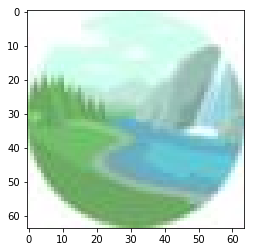

In [22]:
import matplotlib.pyplot as plt
#print(b)
plt.imshow(b, cmap='gray', vmin=0, vmax=255)
plt.show()

In [62]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer

q = QuantumRegister(17, "q")
c = ClassicalRegister(1, 'c')
circ = QuantumCircuit(q, c, name="initializer_circ")

desired_vector = a/np.linalg.norm(a)


circ.initialize(desired_vector, [q[0], q[1], q[2], q[3],q[4], q[5], q[6],q[7], q[8], q[9],q[10],
                                 q[11], q[12],q[13]])

#circ.draw()


In [63]:
#IQFT
sub_q = QuantumRegister(14)
sub_circ = QuantumCircuit(sub_q, name='IQFT')
sub_circ.swap(sub_q[0], sub_q[13])
sub_circ.swap(sub_q[1], sub_q[12])
sub_circ.swap(sub_q[2], sub_q[11])
sub_circ.swap(sub_q[3], sub_q[10])
sub_circ.swap(sub_q[4], sub_q[9])
sub_circ.swap(sub_q[5], sub_q[8])
sub_circ.swap(sub_q[6], sub_q[7])
for j in range(14):
    for k in range(j):
        sub_circ.cu1(math.pi/float(2**(j-k)), sub_q[j], sub_q[k])
    sub_circ.h(sub_q[j])
sub_circ=sub_circ.inverse()
sub_inst = sub_circ.to_instruction()
circ.append(sub_inst, [q[0],q[1],q[2],q[3],q[4], q[5], q[6],q[7], q[8], q[9],q[10],
                                 q[11], q[12],q[13]])
#circ.draw()

In [7]:
#marking |00000.........>
circ.x(q[9])
circ.x(q[13])
circ.x(q[12])
circ.x(q[11])
circ.x(q[10])
circ.ccx(q[9], q[10], q[15])
circ.ccx(q[11], q[12], q[16])
circ.ccx(q[15], q[16], q[17])
circ.ccx(q[13], q[17], q[14])
circ.ccx(q[9], q[10], q[15])
circ.ccx(q[11], q[12], q[16])
circ.ccx(q[15], q[16], q[17])
circ.x(q[13])
circ.x(q[12])
circ.x(q[11])
circ.x(q[10])
circ.x(q[9])
#circ.draw()

In [8]:
#marking |11111.........>
circ.ccx(q[9], q[10], q[15])
circ.ccx(q[11], q[12], q[16])
circ.ccx(q[15], q[16], q[17])
circ.ccx(q[13], q[17], q[14])
circ.ccx(q[9], q[10], q[15])
circ.ccx(q[11], q[12], q[16])
circ.ccx(q[15], q[16], q[17])
#circ.draw()

In [64]:
#marking |0000....>
circ.x(q[10])
circ.x(q[11])
circ.x(q[12])
circ.x(q[13])
circ.ccx(q[10], q[11], q[15])
circ.ccx(q[12], q[13], q[16])
circ.ccx(q[15], q[16], q[14])
circ.ccx(q[10], q[11], q[15])
circ.ccx(q[12], q[13], q[16])
circ.x(q[10])
circ.x(q[11])
circ.x(q[12])
circ.x(q[13])
#circ.draw()

In [5]:
#marking |0001....>
circ.x(q[11])
circ.x(q[12])
circ.x(q[13])
circ.ccx(q[10], q[11], q[15])
circ.ccx(q[12], q[13], q[16])
circ.ccx(q[15], q[16], q[14])
circ.ccx(q[10], q[11], q[15])
circ.ccx(q[12], q[13], q[16])
circ.x(q[11])
circ.x(q[12])
circ.x(q[13])
#circ.draw()

In [5]:
#marking |1000....>
circ.x(q[10])
circ.x(q[11])
circ.x(q[12])
circ.ccx(q[10], q[11], q[15])
circ.ccx(q[12], q[13], q[16])
circ.ccx(q[15], q[16], q[14])
circ.ccx(q[10], q[11], q[15])
circ.ccx(q[12], q[13], q[16])
circ.x(q[10])
circ.x(q[11])
circ.x(q[12])
#circ.draw()

In [6]:
#marking |0111....>
circ.x(q[13])
circ.ccx(q[10], q[11], q[15])
circ.ccx(q[12], q[13], q[16])
circ.ccx(q[15], q[16], q[14])
circ.ccx(q[10], q[11], q[15])
circ.ccx(q[12], q[13], q[16])
circ.x(q[13])
#circ.draw()

In [6]:
#marking |1110....>
circ.x(q[10])
circ.ccx(q[10], q[11], q[15])
circ.ccx(q[12], q[13], q[16])
circ.ccx(q[15], q[16], q[14])
circ.ccx(q[10], q[11], q[15])
circ.ccx(q[12], q[13], q[16])
circ.x(q[10])
#circ.draw()

In [65]:
#marking |1111....>
circ.ccx(q[10], q[11], q[15])
circ.ccx(q[12], q[13], q[16])
circ.ccx(q[15], q[16], q[14])
circ.ccx(q[10], q[11], q[15])
circ.ccx(q[12], q[13], q[16])
#circ.draw()

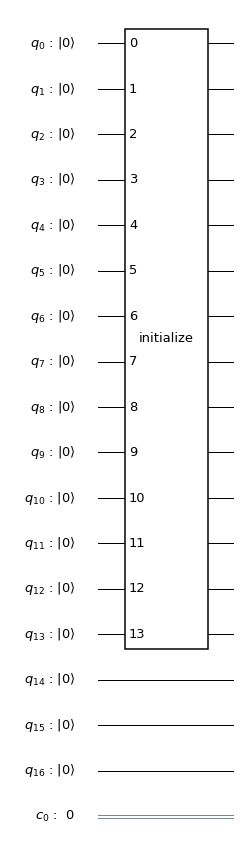

In [6]:
circ.draw()

In [93]:
#marking |1011....>
circ.x(q[12])
circ.ccx(q[10], q[11], q[15])
circ.ccx(q[12], q[13], q[16])
circ.ccx(q[15], q[16], q[14])
circ.ccx(q[10], q[11], q[15])
circ.ccx(q[12], q[13], q[16])
circ.x(q[12])
#circ.draw()

In [43]:
#marking |111....>
circ.ccx(q[11], q[12], q[15])
circ.ccx(q[13], q[15], q[14])
circ.ccx(q[11], q[12], q[15])
#circ.draw()

In [42]:
#marking |000....>
circ.x(q[11])
circ.x(q[12])
circ.x(q[13])
circ.ccx(q[11], q[12], q[15])
circ.ccx(q[13], q[15], q[14])
circ.ccx(q[11], q[12], q[15])
circ.x(q[11])
circ.x(q[12])
circ.x(q[13])
#circ.draw()

In [55]:
#measure ancilla
circ.measure(q[14], c[0])
#circ.draw()

In [56]:
#QFT
sub_q = QuantumRegister(14)
sub_circ = QuantumCircuit(sub_q, name='QFT')
sub_circ.swap(sub_q[0], sub_q[13])
sub_circ.swap(sub_q[1], sub_q[12])
sub_circ.swap(sub_q[2], sub_q[11])
sub_circ.swap(sub_q[3], sub_q[10])
sub_circ.swap(sub_q[4], sub_q[9])
sub_circ.swap(sub_q[5], sub_q[8])
sub_circ.swap(sub_q[6], sub_q[7])
for j in range(14):
    for k in range(j):
        sub_circ.cu1(math.pi/float(2**(j-k)), sub_q[j], sub_q[k])
    sub_circ.h(sub_q[j])
sub_inst = sub_circ.to_instruction()
circ.append(sub_inst, [q[0],q[1],q[2],q[3],q[4], q[5], q[6],q[7], q[8], q[9],q[10],
                                 q[11], q[12],q[13]])
#circ.draw()

In [66]:
# Import Aer
import time
from qiskit import BasicAer
t = time.time()
# Run the quantum circuit on a statevector simulator backend
backend = BasicAer.get_backend('statevector_simulator')
# Create a Quantum Program for execution 
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
elapsed = time.time() - t
#print(outputstate)
#print(np.absolute(outputstate))
print(elapsed)

465.44679522514343


In [3]:
import seaborn as sns
j=np.absolute(outputstate)
sns.set_style("whitegrid")
ax = sns.barplot(x="Events", y = "Count" , data = j)

NameError: name 'outputstate' is not defined

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(18,5))
x=np.absolute(outputstate)
x=x[:128*128]
y_pos = np.arange(128*128)
plt.bar(y_pos, x, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('amplitude')
plt.title('frequency domain')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.show()

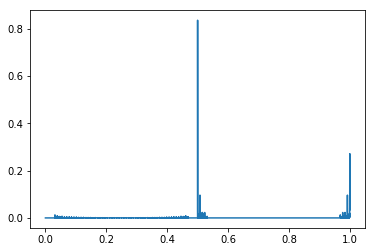

In [67]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
y=np.absolute(outputstate[:32768])
#y=y[:2*128*128]
x = np.linspace(0, 1, 32768)
ax.plot(x,y) ;

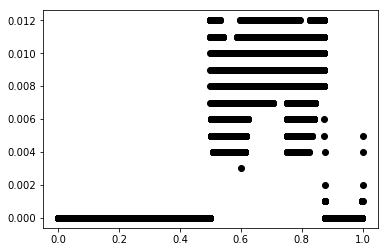

In [17]:
plt.plot(x, y, 'o', color='black');

In [19]:


print(max(math.floor(b)))
#b=b.round()

TypeError: only size-1 arrays can be converted to Python scalars

In [58]:
#a=np.absolute(outputstate[24576:24756*2])*np.linalg.norm(a)
a=np.absolute(outputstate[16384:32768])*np.linalg.norm(a)
c=a[:64*64*3]
print(c[12287])
b=np.reshape(c, (3,64,64))
b=np.transpose(b,(2,1,0))
print(len(outputstate))

133.59763499403724
131072


In [10]:
print(len(np.absolute(outputstate)))

131072


In [30]:
print(sum(np.absolute(outputstate[:131072])**2))

0.014331999999999286


In [86]:
import matplotlib as plt
plt.pyplot.matshow(c)

ValueError: not enough values to unpack (expected 2, got 1)

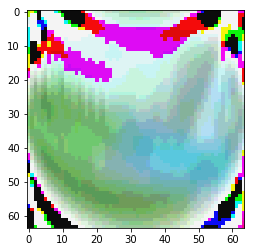

In [59]:
import matplotlib.pyplot as plt
plt.imshow(b.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.show()